<a href="https://colab.research.google.com/github/emm-gl/Vision/blob/main/Vision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

<class 'numpy.ndarray'>


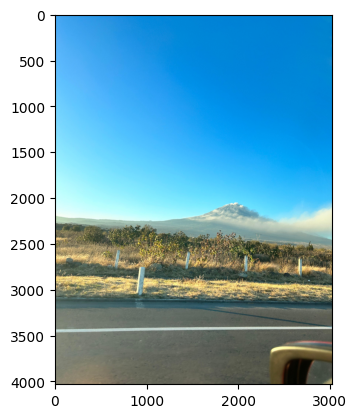

In [ ]:
#Load Image:    Using matplotlib
img1 = mpimg.imread('data/A1.jpeg')
plt.imshow(img1)
print(type(img1))

In [ ]:
img1.shape

(4032, 3024, 3)

numpy.ndarray

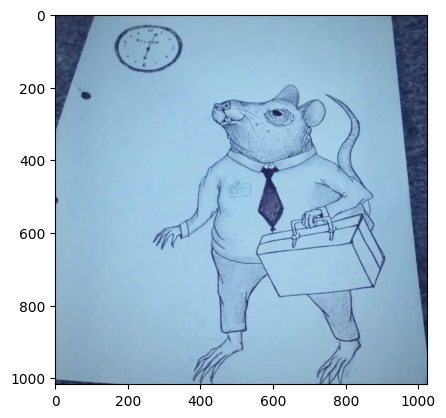

In [ ]:
#Using Open CV: CV2

img2 = cv2.imread('data/A2.jpeg')
plt.imshow(img2)
type(img2)

Open CV gets the image in BGR instead of RGB, just change the format:


AxesImage(size=(1017, 1024))


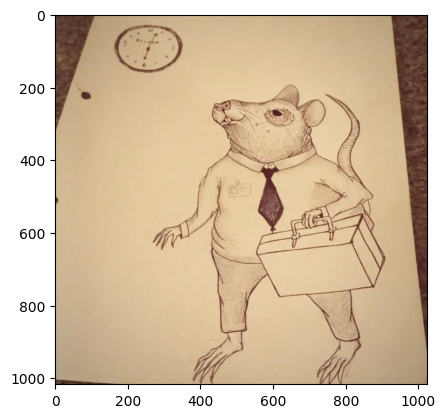

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

In [ ]:
type(img2)

numpy.ndarray

<class 'PIL.JpegImagePlugin.JpegImageFile'>


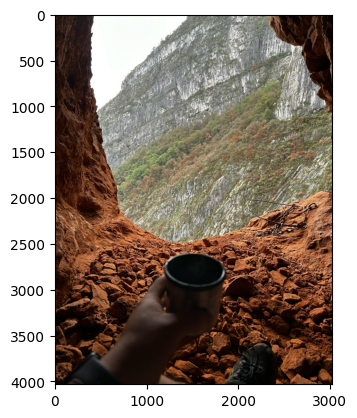

In [ ]:
#Finally using PIL another image library:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/A3.jpeg')
plt.imshow(img3)
print(type(img3))

<class 'numpy.ndarray'>
(4032, 3024, 3)
AxesImage(size=(4032, 3024))


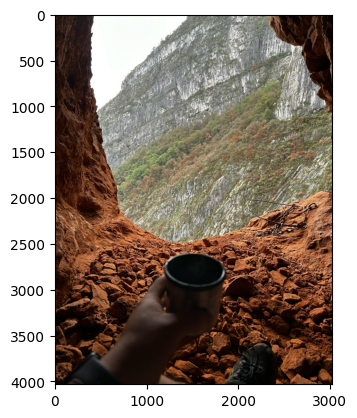

In [ ]:
#Take care, whent PIL gets the image, this is in JPEGImageFile format, if we need to use it as a numpy array
#we should to convert it:

img3 = np.array(img3)
print(type(img3))
print(img3.shape)
print(plt.imshow(img3))


Intensity transformations operate on single pixels of an image for tasks such as contrast manipulation and image thresholding:

Types of function:
1. Linear: Identity and Negative
2. Logarithmic
3. Power-law

**Negative Transform**


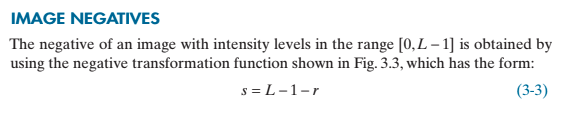

In [ ]:
#Negative function:
#Input image must be a numpy array:

def NegativeImage(InputImage):
  Neg_img = np.max(InputImage) - 1 - InputImage

  return Neg_img

In [ ]:
#Load Images:
img1 = mpimg.imread('data/A1.jpeg')
img2 = mpimg.imread('data/A2.jpeg')
img3 = mpimg.imread('data/A3.jpeg')
img4 = mpimg.imread('data/A4.jpeg')

In [ ]:
#Convert negative images
img1_neg = NegativeImage(img1)
img2_neg = NegativeImage(img2)
img3_neg = NegativeImage(img3)
img4_neg = NegativeImage(img4)

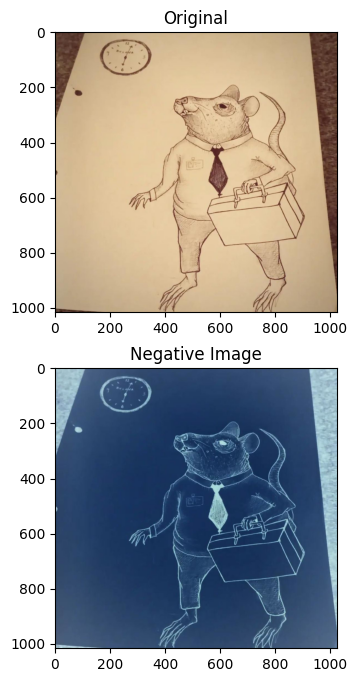

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img2)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img2_neg)
a.set_title('Negative Image')

plt.show()

**Logarithmic Transforms**



In [ ]:
#Logarithmic function:
#Input image must be a numpy array:

def LogTransform(InputImage):
  #c = 1
  c = 255 / np.log(1 + np.max(InputImage))
  log_image = c * (np.log(1 + InputImage))

  #Convert to int from float
  log_image = np.array(log_image, dtype = np.uint8)

  return log_image

In [ ]:
img1_log = LogTransform(img1)
img2_log = LogTransform(img2)
img3_log = LogTransform(img3)
img4_log = LogTransform(img4)

<ipython-input-55-d506e625eb55>:7: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + InputImage))


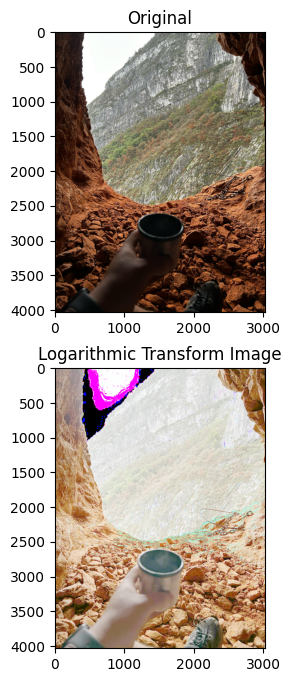

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img3)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img3_log)
a.set_title('Logarithmic Transform Image')

plt.show()

**Power Law (gamma) Transform **

The general form of Power law (Gamma) transformation function is

s = c*r^γ

Where, ‘s’ and ‘r’ are the output and input pixel values, respectively and ‘c’ and γ are the positive constants

In [ ]:
def GammaTransform(InputImage):
  c = 255
  y = 0.4
  gamma_img = np.array(c * (InputImage/255) ** y, dtype = 'uint8')  #Normalize the image
  return gamma_img

In [ ]:
img1_gamma = GammaTransform(img1)
img2_gamma = GammaTransform(img2)
img3_gamma = GammaTransform(img3)
img4_gamma = GammaTransform(img4)

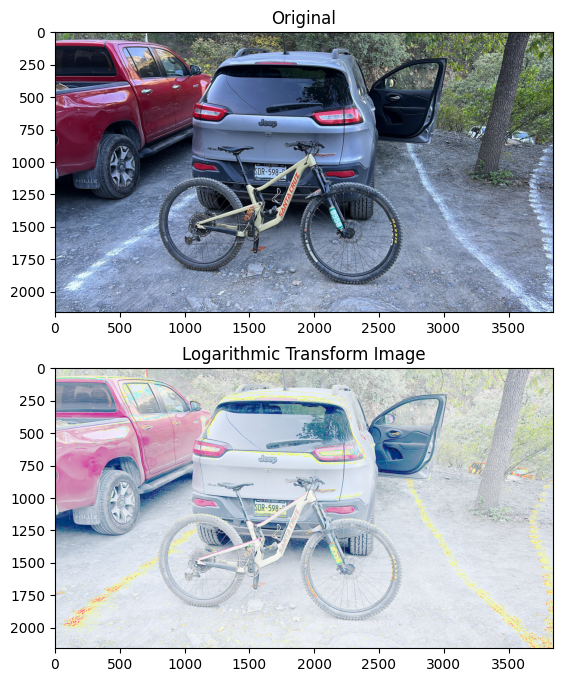

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img4)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img4_log)
a.set_title('Logarithmic Transform Image')

plt.show()